<a href="https://colab.research.google.com/github/harishvo6/Auto-MPG/blob/main/Auto_mpg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PCA and t-SNE Project: Auto MPG**

-----------------------------
## **Objective**
-----------------------------
The objective of this problem is to **explore the data, reduce the number of features by using dimensionality reduction techniques like PCA and t-SNE, and extract meaningful insights**.

-----------------------------
## **Dataset**
-----------------------------
There are 8 variables in the data:

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from 0 to 60 mph (sec.)
- yr: model year
- car name: car model name

## **Importing the necessary libraries and overview of the dataset**

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Importing PCA and t-SNE
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Loading the data**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Python Course/auto-mpg.csv")

In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


### **Data Overview**

-**Observations**

  1) There are total 398 rows and 8 columns in the data set

  2) 3 float , 3 int ,2 object

  3) horsepower is numerical but printed as object


**Sanity checks**
 No missing values




## **Data Preprocessing and Exploratory Data Analysis**


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- Missing value treatment
- Feature engineering (if needed)
- Check the correlation among the variables
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)



In [ ]:
data["car name"].nunique()

305

since "car name" column is of object type it doesn't add any value to our analysis. So dropping the column

In [ ]:
# Creating copy of the data so that we don't lose the original data
data1 = data.copy()
#dropping the car name column
data = data.drop("car name",axis=1)

In [ ]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82
394,44.0,4,97.0,52,2130,24.6,82
395,32.0,4,135.0,84,2295,11.6,82
396,28.0,4,120.0,79,2625,18.6,82


### **Summary Statistics**

In [ ]:
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
# checking if horsepower has any other data type other than numbers
hpIsDigit = pd.DataFrame(data.horsepower.apply(lambda x: x.isdigit()))
data[hpIsDigit.horsepower == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


**Observations:________**

1) There are 6 observations of where horsepower is recorded as "?"

2) We can consider them as missing values

3) we will start with replacing "?" with nan

In [ ]:
data = data.replace("?",np.nan)
data[hpIsDigit.horsepower == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74
330,40.9,4,85.0,NaN,1835,17.3,80
336,23.6,4,140.0,NaN,2905,14.3,80
354,34.5,4,100.0,NaN,2320,15.8,81
374,23.0,4,151.0,NaN,3035,20.5,82


In [ ]:
data['horsepower'].describe()

,horsepower
count,392
unique,93
top,150
freq,22


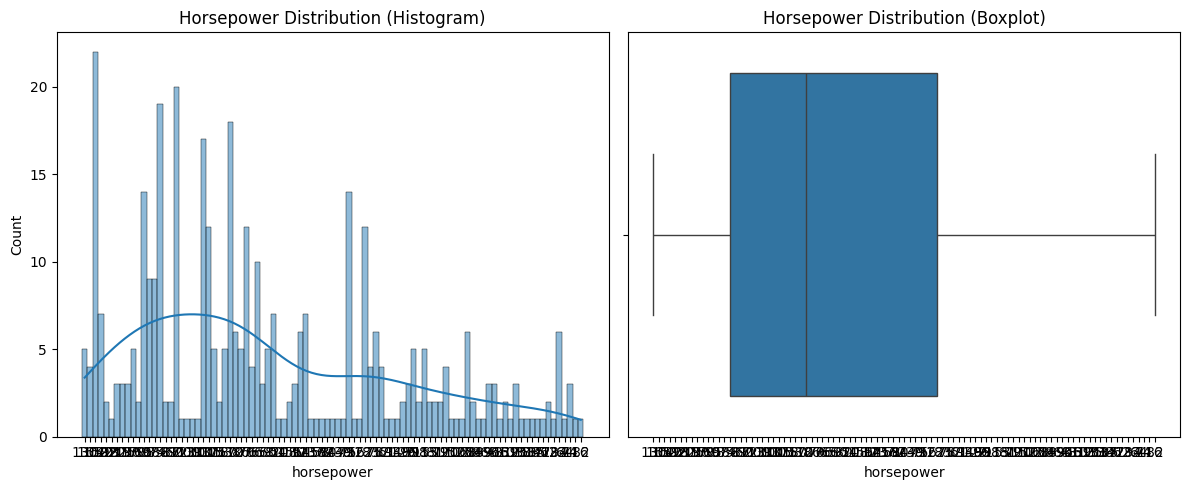

In [ ]:
# Plot histogram and boxplot
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data['horsepower'].dropna(), kde=True, bins=30)
plt.title('Horsepower Distribution (Histogram)')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=data['horsepower'])
plt.title('Horsepower Distribution (Boxplot)')

plt.tight_layout()
plt.show()

* Since the data is skewed we will replace the missing values with median of the data

In [ ]:
data['horsepower'].dtype


dtype('O')

In [ ]:
# Imputing the missing values with the median value of the column horsepower
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')
median_hp = data['horsepower'].median()

data['horsepower'] = data['horsepower'].fillna(median_hp)
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


* Successfully replaced the missing values with median since the data is skewed

**Checking for the correlation among the variables**

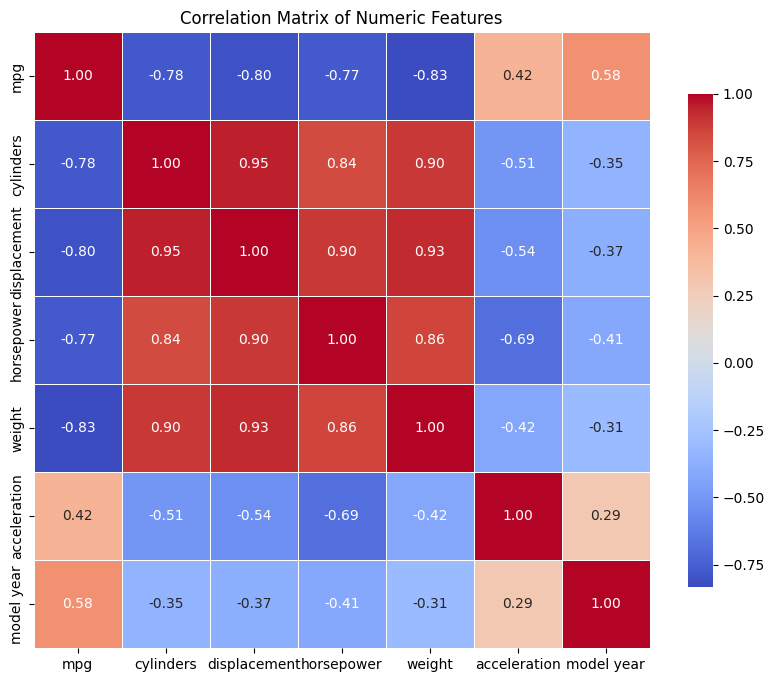

In [ ]:
plt.figure(figsize=(10, 8))
num_cols = data.select_dtypes(include=[np.number]).columns
sns.heatmap(
    data[num_cols].corr(),
    annot=True,
    fmt=".2f",          # Limit to 2 decimal places
    cmap='coolwarm',    # Better color range for positive/negative
    square=True,        # Makes each cell square-shaped
    linewidths=0.5,     # Thin lines between cells
    cbar_kws={"shrink": .8}  # Smaller colorbar
)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

1) The columns "cylinders"  & "displacement" has high correlation among all followed by "displacement" and "weight"

2) Both "cylinders" & "weight" and "displacement" & "horsepower" has equal correlation

3) "horse power" had some good correlation with "weight" & "cylinders"

4)mpg is negativley correlated with cylinders, displacement, horsepower, and weight.

**Distribution of data and outlier detection**

mpg
Skew: 0.46


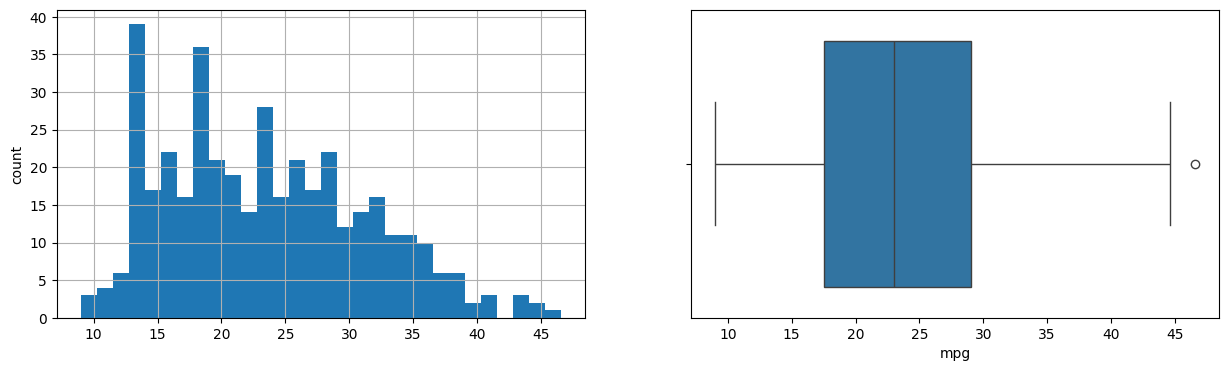

cylinders
Skew: 0.53


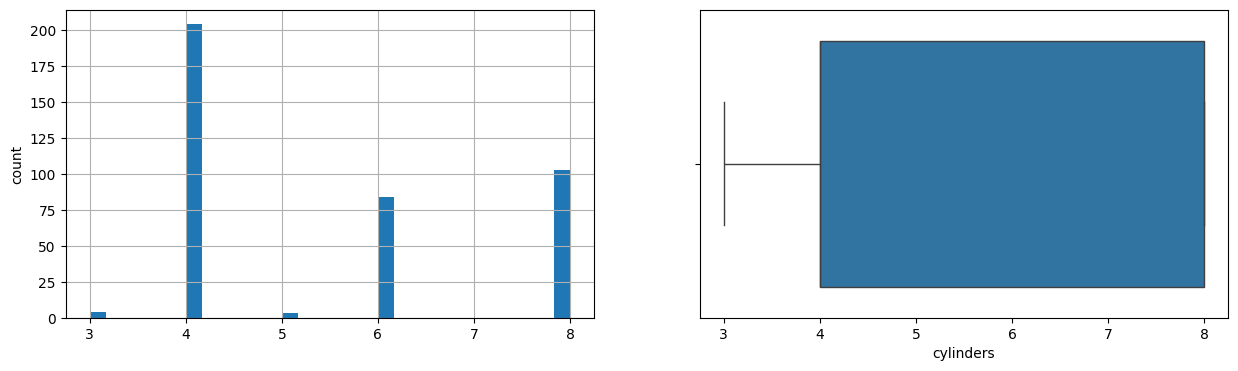

displacement
Skew: 0.72


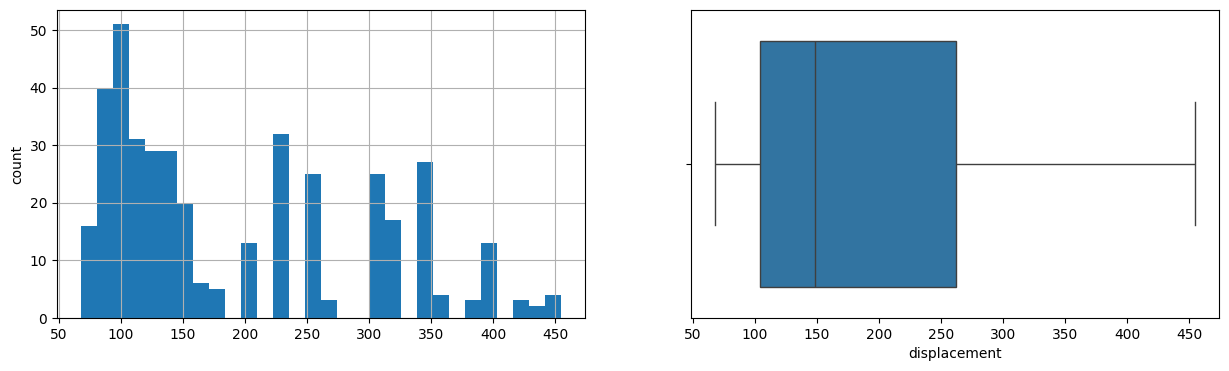

horsepower
Skew: 1.11


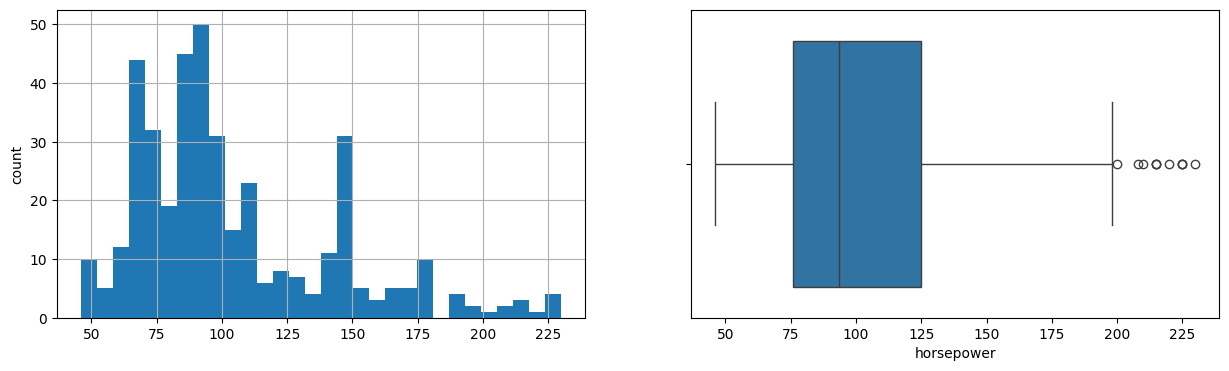

weight
Skew: 0.53


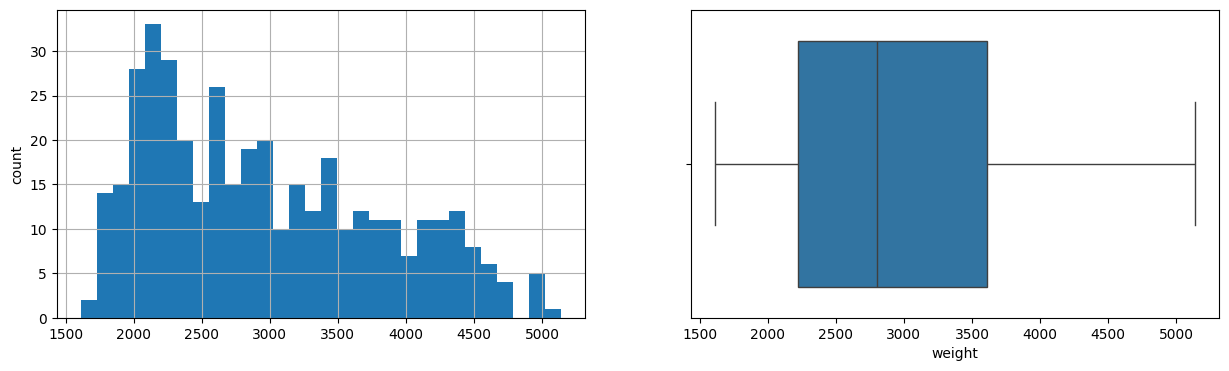

acceleration
Skew: 0.28


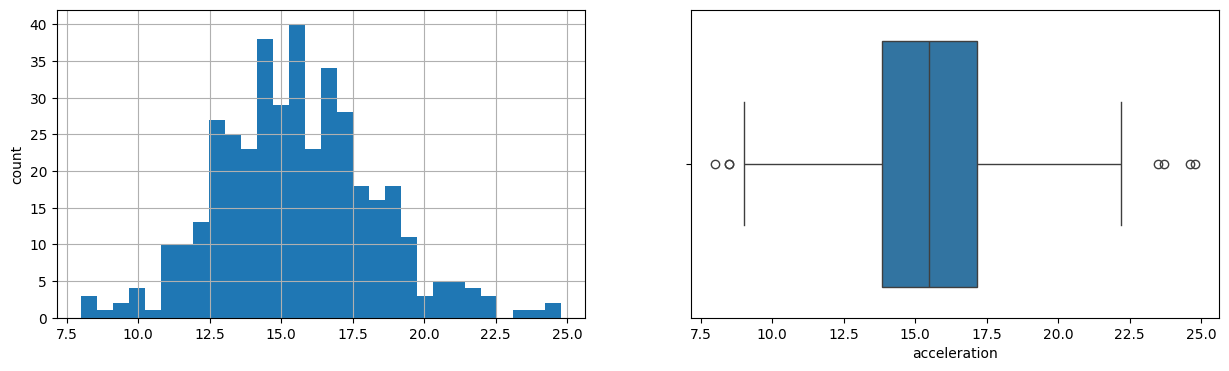

model year
Skew: 0.01


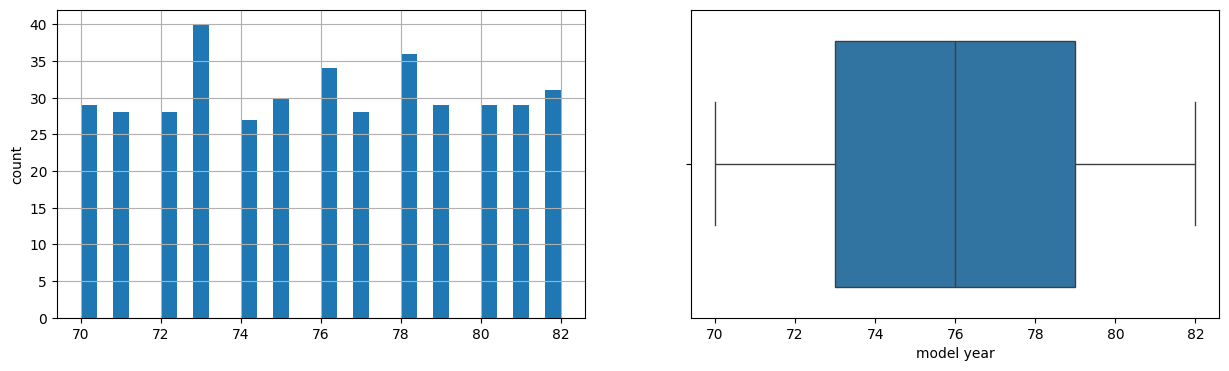

In [ ]:
#creating histogram & box plots to check distribution & see outliers of all the variables
for col in data.columns:
    print(col)
    print('Skew:', round(data[col].skew(), 2))

    plt.figure(figsize=(15, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    data[col].hist(bins=30)
    plt.ylabel('count')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])

    plt.show()

**Observations:**

* Most numerical features in the dataset show moderate right skew, indicating the presence of higher-end values that pull the distribution slightly to the right.
* Several features horsepower, acceleration, mpg have long tails or visible outliers on the higher end
*  acceleration and model year are approximately symmetric, with no significant skew or outlier issues.

### **Scaling the data**

In [ ]:
# Scaling the data
scaler = StandardScaler()

data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [ ]:
data_scaled

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426
...,...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,1.621983
394,2.624265,-0.856321,-0.925936,-1.370127,-0.993671,3.279296,1.621983
395,1.087017,-0.856321,-0.561039,-0.531873,-0.798585,-1.440730,1.621983
396,0.574601,-0.856321,-0.705077,-0.662850,-0.408411,1.100822,1.621983


## **Principal Component Analysis**

In [ ]:
# Defining the number of principal components to generate
n = data_scaled.shape[1]

# Finding principal components for the data
# Apply the PCA algorithm with random_state = 1
pca = PCA(n_components = n, random_state = 1)

# Fit and transform the pca function on scaled data
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))

# The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

In [ ]:
data_pca1

,0,1,2,3,4,5,6
0,2.661556,-0.918577,-0.558420,0.740000,-0.549433,0.089079,-0.118566
1,3.523307,-0.789779,-0.670658,0.493223,-0.025134,-0.203588,0.101518
2,2.998309,-0.861604,-0.982108,0.715598,-0.281324,-0.137351,-0.055167
3,2.937560,-0.949168,-0.607196,0.531084,-0.272607,-0.295916,-0.121296
4,2.930688,-0.931822,-1.078890,0.558607,-0.543871,-0.007707,-0.167301
...,...,...,...,...,...,...,...
393,-1.420970,1.225252,-0.286402,-0.671666,0.054472,0.187878,0.101922
394,-4.094686,1.279998,1.960384,1.375464,0.740606,-0.175097,0.087391
395,-1.547254,1.252540,-1.906999,-0.323768,-0.255922,0.254531,0.149028
396,-2.022942,1.132137,0.609384,-0.464327,0.186656,-0.089169,0.075018


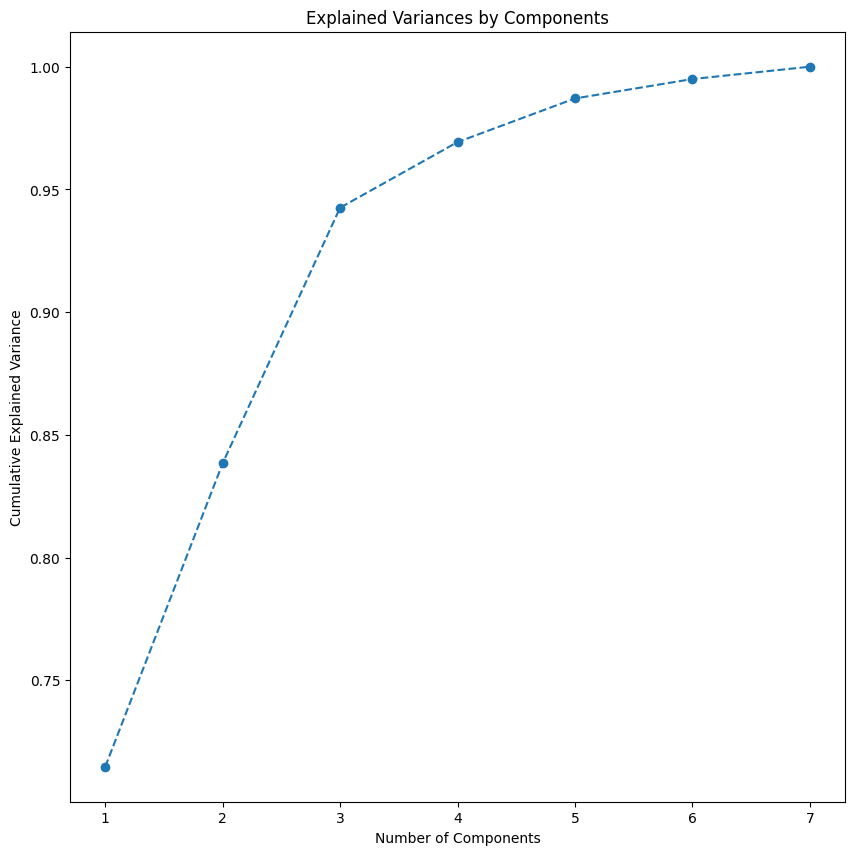

In [ ]:
# Visualize the explained variance by individual components
plt.figure(figsize = (10, 10))

plt.plot(range(1, 8), exp_var.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [ ]:
# Finding the least number of components that can explain more than 70% variance
sum = 0

for ix, i in enumerate(exp_var):

    sum = sum + i

    if(sum>0.70):

        print("Number of PCs that explain at least 70% variance:", ix + 1)
        break

Number of PCs that explain at least 70% variance: 1


**Observations:___________________**
We can see that out of the original 8 features, we have reduced the number of features through PCA to 1 principal components. The first principal components explain approximately 70% of the original variance.

So that is about a 88% reduction in the dimensionality of the dataset with only a loss of 30% in variance.

Now, let us look at these principal components as a linear combination of the original features.

In [ ]:
pc_comps = ['PC1', 'PC2', 'PC3']

data_pca = pd.DataFrame(np.round(pca.components_[:3,:], 2), index = pc_comps, columns = data_scaled.columns)

data_pca.T

,PC1,PC2,PC3
mpg,-0.40,0.21,-0.26
cylinders,0.42,0.19,0.14
displacement,0.43,0.18,0.10
horsepower,0.42,0.09,-0.17
weight,0.41,0.22,0.28
acceleration,-0.28,-0.02,0.89
model year,-0.23,0.91,-0.02


**Observations**
* Each principal component is a linear combination of the original features.
* For example, we can write the equation for PC1 in the following manner:
PC1 = -0.40*mpg + 0.42 * cylinders + 0.43 * displacement + 0.42 * horsepower + 0.41 * weight - 0.28 * acceleration - 0.23 * model year
* The first principal components pick up around 70% of the variability in the data.
* The magnitude of the weights multiplied with each of the original features that comprise a principal component, is one way to look at the importance of each of the original features. This is relevant in a business context, in deciding which features in the dataset are important for the problem and which ones are not. Normally, a threshold is used as a cut-off to determine if a feature is important or not. For example, we can consider only those weights with an absolute value greater than 0.40 as significant

#### **Interpret the coefficients of the first three principal components from the below DataFrame**

In [ ]:
def color_high(val):
    if val <= -0.40:
        return 'background: pink'

    elif val >= 0.40:
        return 'background: skyblue'

data_pca.T.style.applymap(color_high)

<ipython-input-24-1be40fa76ea0>:8: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  data_pca.T.style.applymap(color_high)


,PC1,PC2,PC3
mpg,-0.400000,0.210000,-0.260000
cylinders,0.420000,0.190000,0.140000
displacement,0.430000,0.180000,0.100000
horsepower,0.420000,0.090000,-0.170000
weight,0.410000,0.220000,0.280000
acceleration,-0.280000,-0.020000,0.890000
model year,-0.230000,0.910000,-0.020000


**Observations:__________________**

* PC1 likely captures vehicle size/power: high values in weight, displacement, horsepower relate to low mpg.
* PC2 capture vehicle age i.e model year
* PC3 concentrates on performance of the vehicle like how fast a car accelerates

#### **Visualize the data in 2 dimensions using the first two principal components**



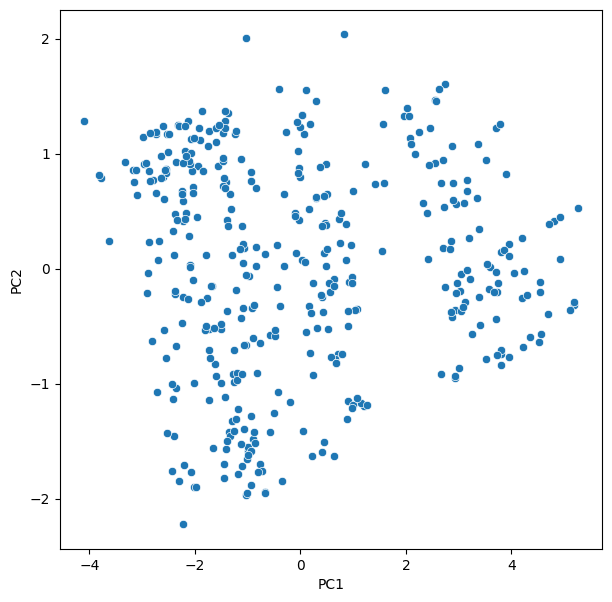

In [ ]:
plt.figure(figsize = (7, 7))

sns.scatterplot(x = data_pca1[0], y = data_pca1[1])

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

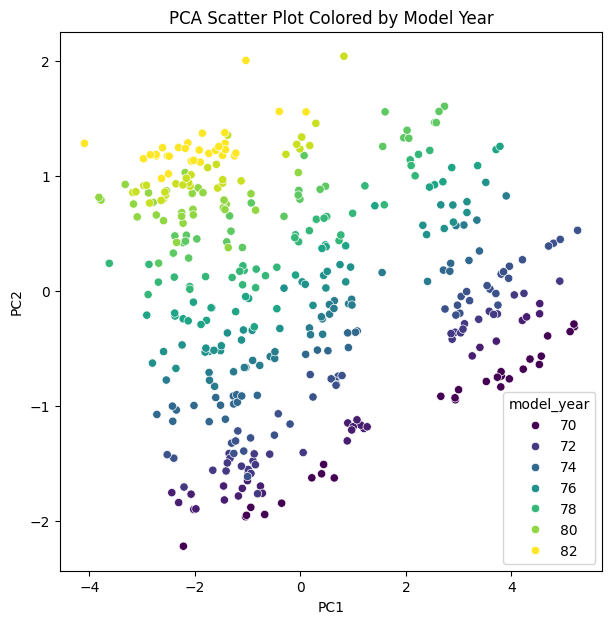

In [ ]:

df_concat = pd.concat([data_pca1.iloc[:, :2], data['model year']], axis=1)
df_concat.columns = ['PC1', 'PC2', 'model_year']

plt.figure(figsize=(7, 7))
sns.scatterplot(data=df_concat, x='PC1', y='PC2', hue='model_year', palette='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Scatter Plot Colored by Model Year")
plt.show()

**Observations:___________**

## **t-SNE**

In [ ]:
# Fitting t-SNE with number of components equal to 2
tsne = TSNE(n_components = 2, random_state = 1)

data_tsne = tsne.fit_transform(data_scaled)

In [ ]:
data_tsne.shape

(398, 2)

In [ ]:
data_tsne = pd.DataFrame(data = data_tsne, columns = ['Component 1', 'Component 2'])

In [ ]:
data_tsne

,Component 1,Component 2
0,36.707752,-2.108404
1,37.192513,-0.058722
2,37.241322,-1.185374
3,36.654381,-1.296686
4,37.348392,-1.658431
...,...,...
393,-14.034748,4.542985
394,-22.320072,15.480506
395,-19.144842,3.642219
396,-14.642265,8.776230


**Observations:______________**

#### **Visualize the clusters w.r.t different variables using scatter plot and box plot**

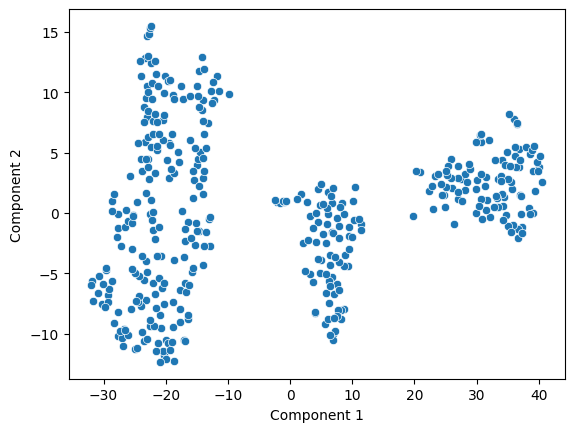

In [ ]:
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1])

plt.show()

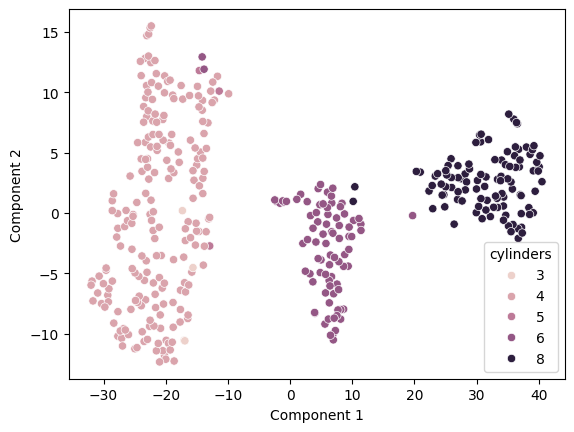

In [ ]:
# Let's see the scatter plot of the data w.r.t number of cylinders
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = data.cylinders)

plt.show()

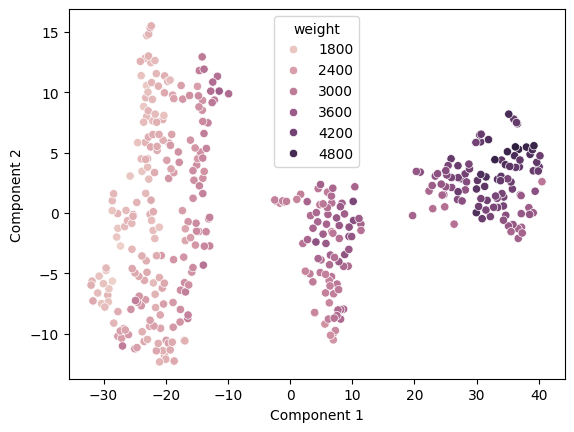

In [ ]:
# Let's see the scatter plot of the data w.r.t weight
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = data.weight)

plt.show()

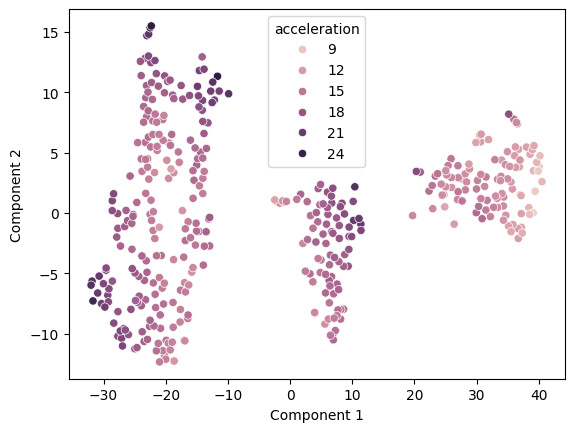

In [ ]:
# Let's see the scatter plot of the data w.r.t acceleration
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = data.acceleration)

plt.show()

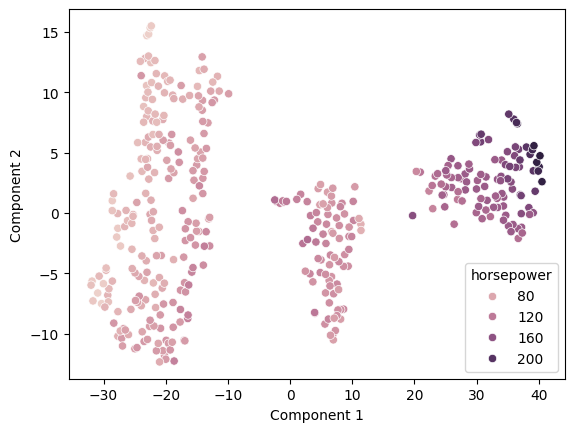

In [ ]:
# Let's see the scatter plot of the data w.r.t horsepower
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = data.horsepower)

plt.show()

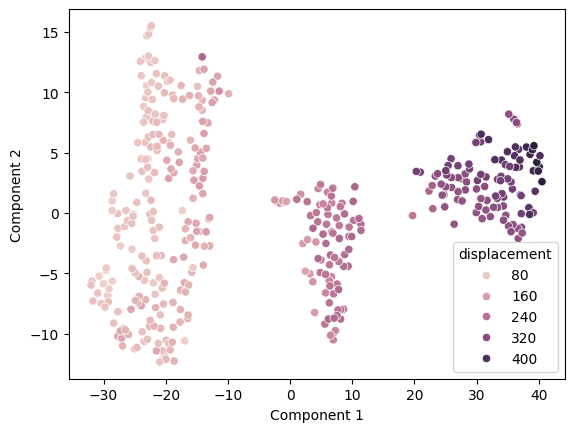

In [ ]:
# Let's see the scatter plot of the data w.r.t displacement
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = data.displacement)

plt.show()

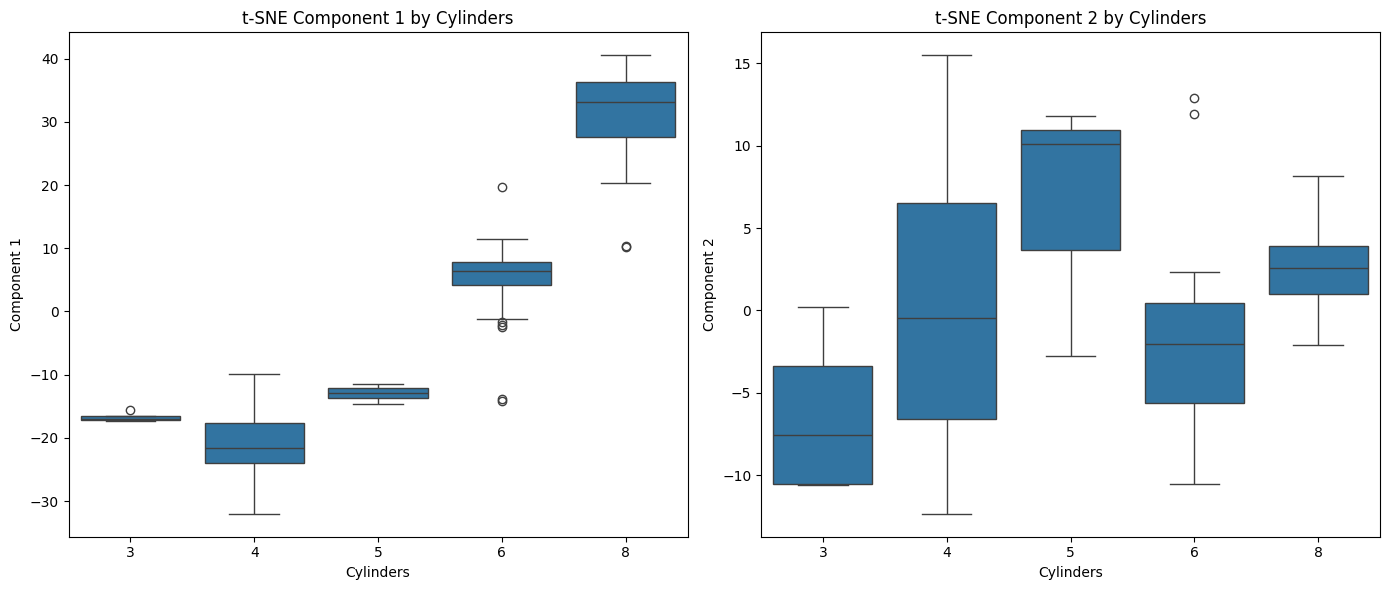

In [ ]:
# Create subplots for both t-SNE components
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box plot for t-SNE Component 1
sns.boxplot(x=data['cylinders'], y=data_tsne.iloc[:, 0], ax=axes[0])
axes[0].set_title('t-SNE Component 1 by Cylinders')
axes[0].set_xlabel('Cylinders')
axes[0].set_ylabel('Component 1')

# Box plot for t-SNE Component 2
sns.boxplot(x=data['cylinders'], y=data_tsne.iloc[:, 1], ax=axes[1])
axes[1].set_title('t-SNE Component 2 by Cylinders')
axes[1].set_xlabel('Cylinders')
axes[1].set_ylabel('Component 2')

plt.tight_layout()
plt.show()

**Observations:___________**

## **Actionable Insights and Recommendations**

**write your insights and recommendations here:**  ______
* After EDA and feature scaling, PCA was used to assess linear structure in the data.
* The first principal component (PC1) explained approximately 70% of the variance, suggesting strong linear compressibility.
* To explore potential nonlinear relationships and visual groupings, t-SNE was applied with 2 components. This allowed us to visualize the data in 2D space and revealed distinct clusters.
*These clusters were further analyzed by mapping various features (e.g., weight, acceleration) to assess their contribution to the underlying structure.
 We observed that weight,displacement, horsepower, cylinders showed clearer separation across clusters, while acceleration values were spread more uniformly, indicating its lesser impact on clustering.

**Business recommendations**

Based on PCA and t-SNE analysis, we discovered that vintage cars naturally group into distinct segments. We recommend leveraging these clusters for customer segmentation, marketing personalization, and building a preference-based recommendation engine to boost user engagement and vintage car sales.”